# p26: Eigenvalues of 2nd order Chebyshev diff. matrix

In [1]:
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,argsort,diag,real,imag,pi,array,polyfit,polyval,zeros
from numpy.linalg import eig
from scipy.interpolate import barycentric_interpolate
from matplotlib.pyplot import figure,loglog,semilogy,plot,title,ylabel,text,xlim

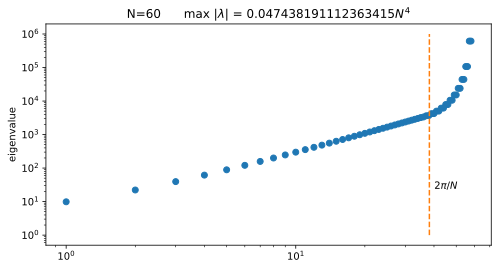

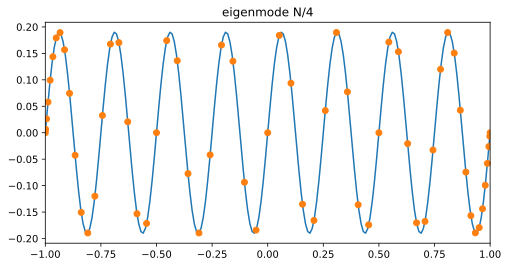

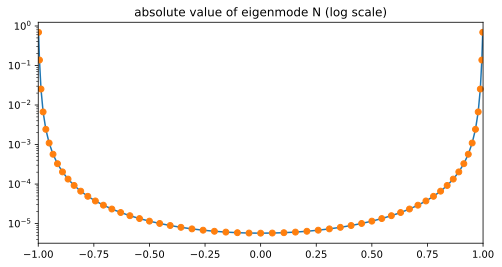

In [2]:
N = 60; D, x = cheb(N); D2 = dot(D,D); D2 = D2[1:N,1:N]
Lam, V = eig(D2)
ii = argsort(-Lam); e = Lam[ii]; V = V[:,ii]

# Plot eigenvalues
figure(figsize=(8,4))
loglog(-e,'o')
semilogy(2*N/pi*array([1,1]),array([1,1e6]),'--')
ylabel('eigenvalue')
title('N='+str(N)+'      max |$\\lambda$| = '+str(max(-e)/N**4)+'$N^4$')
text(2.1*N/pi,24,'$2\\pi/N$')

# Plot eigenmode N/4 (physical)
figure(figsize=(8,4))
vN4 = zeros(N+1)
vN4[1:N] = V[:,N//4];
xx = arange(-1.0,1.01,0.01)
#vv = polyval(polyfit(x,vN4,N),xx)
vv = barycentric_interpolate(x,vN4,xx)
plot(xx,vv,'-')
plot(x,vN4,'o')
xlim((-1.0,1.0))
title('eigenmode N/4')

# Plot eigenmode N (nonphysical)
figure(figsize=(8,4))
vN = V[:,N-2]
semilogy(x[1:N],abs(vN))
plot(x[1:N],abs(vN),'o')
xlim((-1.0,1.0))
title('absolute value of eigenmode N (log scale)');